# (Ford GoBike System Data)
## By Mohamed Bayoumy

## Investigation Overview

> In this investigation i would like to focus on duration of the trip and its relation with members gender and users type
## Dataset Overview

> My Dataset contains 183412 rows and 11 columns and it contains numerical columns like age and duration of the trip

> It also contains categorical columns like [member gender, start station name, end station name]

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv("fordgobike.csv")
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# convert the Start Time column to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

In [4]:
#extract month and day of week from Start Time to create new columns
df['month'] = df['start_time'].dt.month_name()
df['day_of_week'] = df['start_time'].dt.day_name()

In [5]:
df["age"]=2021-df["member_birth_year"]
df["age"]

0         37.0
1          NaN
2         49.0
3         32.0
4         47.0
          ... 
183407    25.0
183408    37.0
183409    31.0
183410    33.0
183411    32.0
Name: age, Length: 183412, dtype: float64

In [6]:
# create a new columns contains time with minutes
df["duration_min"]=df.duration_sec/60

In [7]:
df.drop(["start_station_latitude","start_station_longitude","end_station_latitude","end_station_longitude","end_time","start_station_id","end_station_id","bike_id","member_birth_year"], axis = 1, inplace=True)
df.head(1)

,duration_sec,start_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,month,day_of_week,age,duration_min
0,52185,2019-02-28 17:32:10.145,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,February,Thursday,37.0,869.75


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distrubtion of The Age of the Members

> The majority of the members were between 25 and 40 years and ةost of them were 30 years old

In [8]:
days_ordered = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['days_ordered'] = pd.Categorical(df['day_of_week'], categories=days_ordered, ordered=True)

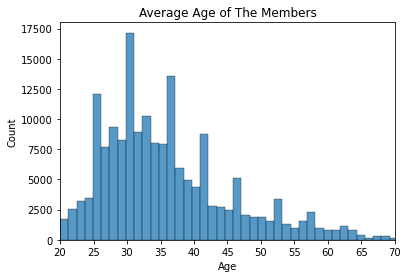

In [9]:
ticks=[20,25,30,35,40,45,50,55,60,65,70]
sns.histplot(x='age', data=df,bins=100)
plt.xlim(20,70)
plt.title("Average Age of The Members")
plt.xlabel("Age")
plt.xticks(ticks);

## Distrubtion of the Time of The trip

> Plotted on a logarithmic scale, Most of the Trips takes between 3 and 15 minutes

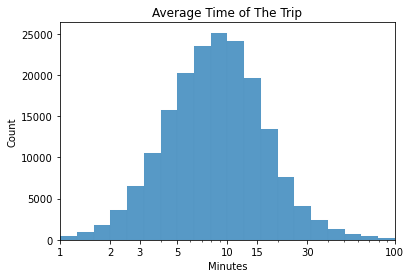

In [10]:
bins=10 ** np.arange(0, 3+0.1, 0.1)
sns.histplot(x='duration_min', data=df,bins=bins)
plt.xscale("log")
ticks = [ 1, 2, 3, 5, 10, 15,  30, 100]
labels = ['{}'.format(v) for v in ticks]
plt.title("Average Time of The Trip")
plt.xlabel("Minutes")
plt.xlim(1,100)
plt.xticks(ticks,labels);

## Top 10 Start Stations
> Marke St at 10th St is the Most common start stations



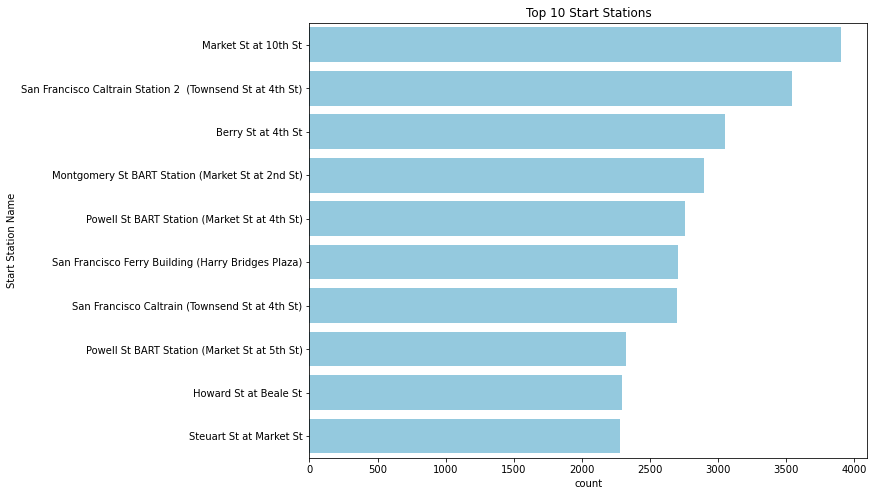

In [11]:
plt.subplots(figsize=(10, 8))
top_start_stations=df['start_station_name'].value_counts()[:10].index.tolist()
sns.countplot(y='start_station_name', data=df, order=top_start_stations,color='skyblue')
plt.title("Top 10 Start Stations")
plt.ylabel("Start Station Name");

## The Relation between Duration per Minute and Age
> The relationship between them is inverse, as the higher the age, the shorter the trip time

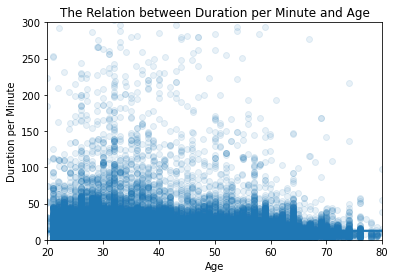

In [12]:
sns.regplot(x='age', y='duration_min', data=df, x_jitter=0.04, scatter_kws={'alpha':1/10} )
plt.title("The Relation between Duration per Minute and Age")
plt.xlabel("Age")
plt.ylabel("Duration per Minute")
plt.ylim(0,300)
plt.xlim(20,80);

### The Relation between Gender, Duration per Minute and Days
> All the days, Female spent more time on their journeys than male

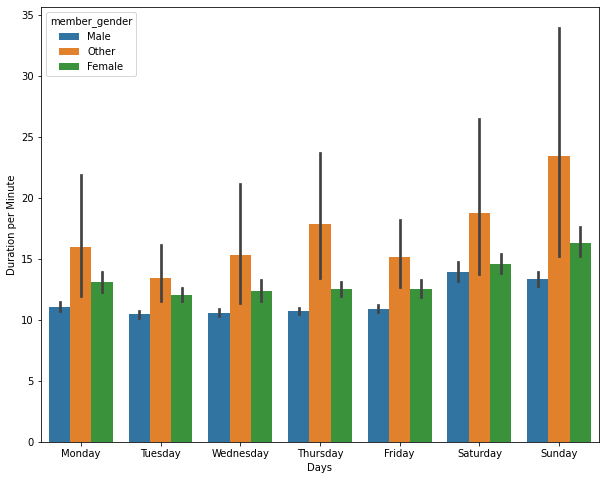

In [13]:
plt.subplots(figsize=(10, 8))
sns.barplot(x='days_ordered', y='duration_min', data=df,hue='member_gender')
plt.ylabel("Duration per Minute")
plt.xlabel("Days");

### The Relation between Users, Duration per Minute and Days
> All the days,customers spent more time on their journeys than subscribers

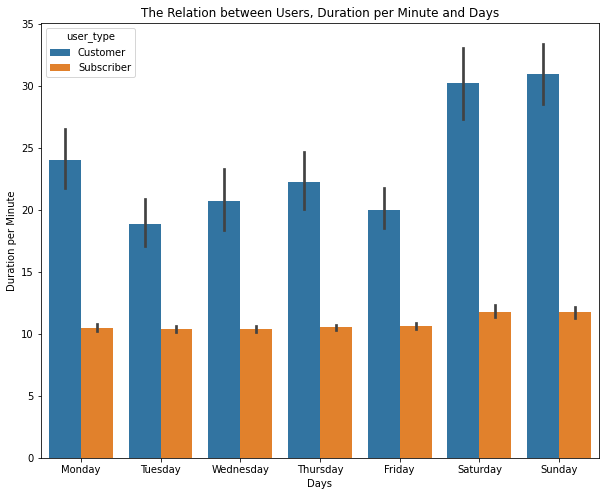

In [14]:
plt.subplots(figsize=(10, 8))
sns.barplot(x='days_ordered', y='duration_min', data=df,hue='user_type')
plt.ylabel("Duration per Minute")
plt.xlabel("Days")
plt.title("The Relation between Users, Duration per Minute and Days");

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [15]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 731626 bytes to slide_deck_template.slides.html
